# Calculation for Protocol Sizes in FWK21

This notebook does some simple calculations for the proof size of the protocol by Farzaliyev et al.
In addition to calculations for a simialr protocol with fully splitting rings.

In [80]:
import math
import matplotlib.pyplot as plt
import numpy as np
N= 1
q = 2**63
delta_1 = 2**45
lam = 1
mu = 1
l = 1024
d = 4096
eta = 2
k=4

In [81]:
def bits_to_megabytes(bits):
    """Converts bits to megabytes."""
    return bits / 8000000



## Theoretical size of the FWK protocol

$$
(\mu+8 N+2+\eta) d\lfloor\log q\rfloor+(\lambda+\mu+8 N+2+\eta) d\lfloor\log q\rfloor+\eta \frac{d}{l}\lfloor\log q\rfloor+256
$$

## Theoretical size of the shortness protocol
$$
(2 \lambda+10 N) \frac{d^2}{l}\lfloor\log q\rfloor+(\lambda+2 \mu+7) d\lfloor\log q\rfloor+256
$$


# Shuffle size FWK

In [82]:
FWK_shuffle_size=(mu + 8*N +2+ eta)*d*math.log2(q) + (lam +mu +8*N +2 +eta)*d*math.log2(q) + eta*d/l*math.log2(q)+256
FWK_shuffle_size

6968056.0

In [83]:
bits_to_megabytes(FWK_shuffle_size)/N #number of megabytes for N=10^5 divided by the number of voters

0.871007

# Proof of shortness FWK size

In [84]:
FWK_short_size= (2*lam+ 10*N)*((d**2)/l)*math.log2(q)+(lam +2*mu+7)*d*math.log2(q)+256
FWK_short_size

14967040.0

## Size per vote

In [85]:
bits_to_megabytes(FWK_short_size)/N #number of megabytes for N=10^5 divided by the number of voters

1.87088

# Shuffle size FWK with automorphism and fully splitting ring

## Theoretical size with automorphism
$$
(\mu+8 N+2+\eta) d\lfloor\log q\rfloor+k(\lambda+\mu+8 N+2+\eta) d\lfloor\log q\rfloor+\eta\lfloor\log q\rfloor+256
$$
## Theoretical size of the ENS20 shortness protocol

$$
(\lambda+n / d+4) d\lceil\log q\rceil+k(\lambda+\mu+n / d+3) d\left\lceil\log 2 \delta_1\right\rceil
$$

setting $n = (\lambda + 5N)*d$ yields

$$
(\mu + \frac{(\lambda + 5N)*d}{d} + 4)d \log q + k(\lambda + \mu + (\lambda +5N) + 3)*d*\log(2\delta_1)
$$

In [86]:
auto_shuffle_size= (mu + 8*N +2+ eta)*d*math.log2(q) + k*(lam +mu +8*N +2 +eta)*d*math.log2(q) + eta*(d/l)*math.log2(q)
auto_shuffle_size

17805816.0

In [87]:
bits_to_megabytes(auto_shuffle_size)/N

2.225727

# Proof of shortness ENS20

In [88]:
ENS20_short_size = (mu +(lam + 5*N)*d/d + 4) * d * math.log2(q) + k*(lam + mu + (lam +5*N)*d/d + 3)*d * math.log2(2*delta_1)
ENS20_short_size

11128832.0

In [89]:
bits_to_megabytes(ENS20_short_size)/N

1.391104

# Plotting the size for different values

In [90]:
N_values = np.arange(1, 10)  # N from 1 to 100000

In [91]:
def FWK_size_func(N, mu, eta, d, q, lam, l):
    size  = (mu + 8*N +2+ eta)*d*math.log2(q) + (lam +mu +8*N +2 +eta)*d*math.log2(q) + eta*d/l*math.log2(q)+256
    short_term = (2*lam+ 10*N)*((d**2)/l)*math.log2(q)+(lam +2*mu+7)*d*math.log2(q)+256
    return size+short_term

plot_sizes_FWK = FWK_size_func(N_values, mu, eta, d, q, lam, l)

def auto_size_func(N, mu, eta, d, q, lam, l):
    size_auto  =  (mu + 8*N +2+ eta)*d*math.log2(q) + k*(lam +mu +8*N +2 +eta)*d*math.log2(q) + eta*(d/l)*math.log2(q)
    short_term_auto = (mu +(lam + 5*N)*d/d + 4) * d * math.log2(q) + k*(lam + mu + (lam +5*N)*d/d + 3)*d * math.log2(2*delta_1)
    return size_auto + short_term_auto

plot_sizes_auto = auto_size_func(N_values, mu, eta, d, q, lam, l)

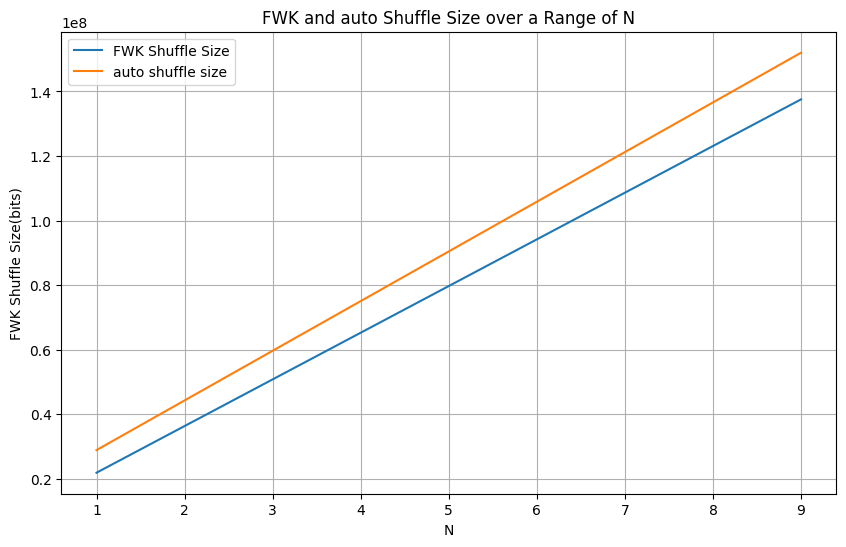

In [92]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, plot_sizes_FWK, label='FWK Shuffle Size')
plt.plot(N_values, plot_sizes_auto, label = 'auto shuffle size')
plt.title('FWK and auto Shuffle Size over a Range of N')
plt.xlabel('N')
plt.ylabel('FWK Shuffle Size(bits)')
plt.grid(True)
plt.legend()
plt.show()